# HW6 Spike sorting
* Read this page: https://en.wikipedia.org/wiki/Spike_sorting#:~:targetText=Spike%20sorting%20is%20a%20class,neurons%20from%20background%20electrical%20noise. 
* Use dimensionality reduction techniques and clustering algorithms to identify groups of similar spikes
* For instance: 
    * TRY DIFFERENT THRESHOLDS TO EXTRACT SPIKES (change tf parameter)
    * DO PCA
    * DO KMEANs
    * Visualize average waveform associated to each spike: 
        * plt.plot(mean(waveform[labels==0], axis=0))
        
* How many waveforms (neurons/units) are there?
* Plot the clustering result against the first 2 principal components
* Plot the average waveform of each neuron overlaid

In [1]:
import numpy as np
import pylab as plt
from sklearn.decomposition import FastICA, PCA
trace = np.load('spike_sort/simulation_1.npy')
print(trace.shape)
plt.plot(trace[:100000])
plt.show()

(2880000,)


<Figure size 640x480 with 1 Axes>

In [2]:
def get_spikes(data, spike_window=80, tf=5, offset=10, max_thresh=350):
    # extract spike waveforms
    # Calculate threshold based on data mean
    thresh = np.mean(np.abs(data)) *tf

    # Find positions wherere the threshold is crossed
    pos = np.where(data > thresh)[0]
    pos = pos[pos > spike_window]

    # Extract potential spikes and align them to the maximum
    spike_samp = []
    wave_form = np.empty([1, spike_window*2])
    for i in pos:
        if i < data.shape[0] - (spike_window+1):
            # Data from position where threshold is crossed to end of window
            tmp_waveform = data[i:i+spike_window*2]

            # Check if data in window is below upper threshold (artifact rejection)
            if np.max(tmp_waveform) < max_thresh:
                # Find sample with maximum data point in window
                tmp_samp = np.argmax(tmp_waveform) +i

                # Re-center window on maximum sample and shift it by offset
                tmp_waveform = data[tmp_samp-(spike_window-offset):tmp_samp+(spike_window+offset)]

                # Append data
                spike_samp = np.append(spike_samp, tmp_samp)
                wave_form = np.append(wave_form, tmp_waveform.reshape(1, spike_window*2), axis=0)

    # Remove duplicates
    ind = np.where(np.diff(spike_samp) > 1)[0]
    spike_samp = spike_samp[ind]
    wave_form = wave_form[ind]

    return spike_samp, wave_form

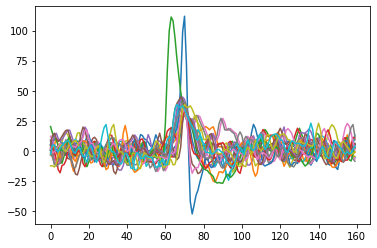

In [3]:
spike_samp, wave_form = get_spikes(trace, spike_window=80, tf=5, offset=10)

m, n = wave_form.shape
plt.plot(wave_form[:20].T)

# Find best scaler for PCA

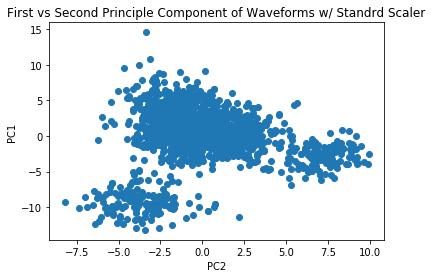

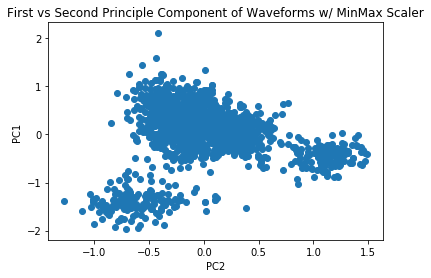

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pca = PCA(n_components = 2)
stdscaler= StandardScaler()
waveform_stdscl = stdscaler.fit_transform(wave_form)
X2D_std = pca.fit_transform(waveform_stdscl)
mmscaler= MinMaxScaler()
waveform_mmscl = mmscaler.fit_transform(wave_form)
pca = PCA(n_components = 2)
X2D_mm = pca.fit_transform(waveform_mmscl)

plt.scatter(X2D_std[:, 1], X2D_std[:, 0])
plt.title('First vs Second Principle Component of Waveforms w/ Standrd Scaler')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.show()

plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('First vs Second Principle Component of Waveforms w/ MinMax Scaler')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.show()

Plots show 3 main groups: 2 small and 1 large.
MinMax scaler yields better separation.

# Find Optimal Spike Sorting Parameters

In [5]:
spike_samp, wave_form_80_5 = get_spikes(trace, spike_window=80, tf=5, offset=10)
spike_samp, wave_form_80_10 = get_spikes(trace, spike_window=80, tf=10, offset=10)
spike_samp, wave_form_80_15 = get_spikes(trace, spike_window=80, tf=15, offset=10)
spike_samp, wave_form_60_5 = get_spikes(trace, spike_window=60, tf=5, offset=10)
spike_samp, wave_form_60_10 = get_spikes(trace, spike_window=60, tf=10, offset=10)
spike_samp, wave_form_60_15 = get_spikes(trace, spike_window=60, tf=15, offset=10)
spike_samp, wave_form_40_5 = get_spikes(trace, spike_window=40, tf=5, offset=10)
spike_samp, wave_form_40_10 = get_spikes(trace, spike_window=40, tf=10, offset=10)
spike_samp, wave_form_40_15 = get_spikes(trace, spike_window=40, tf=15, offset=10)

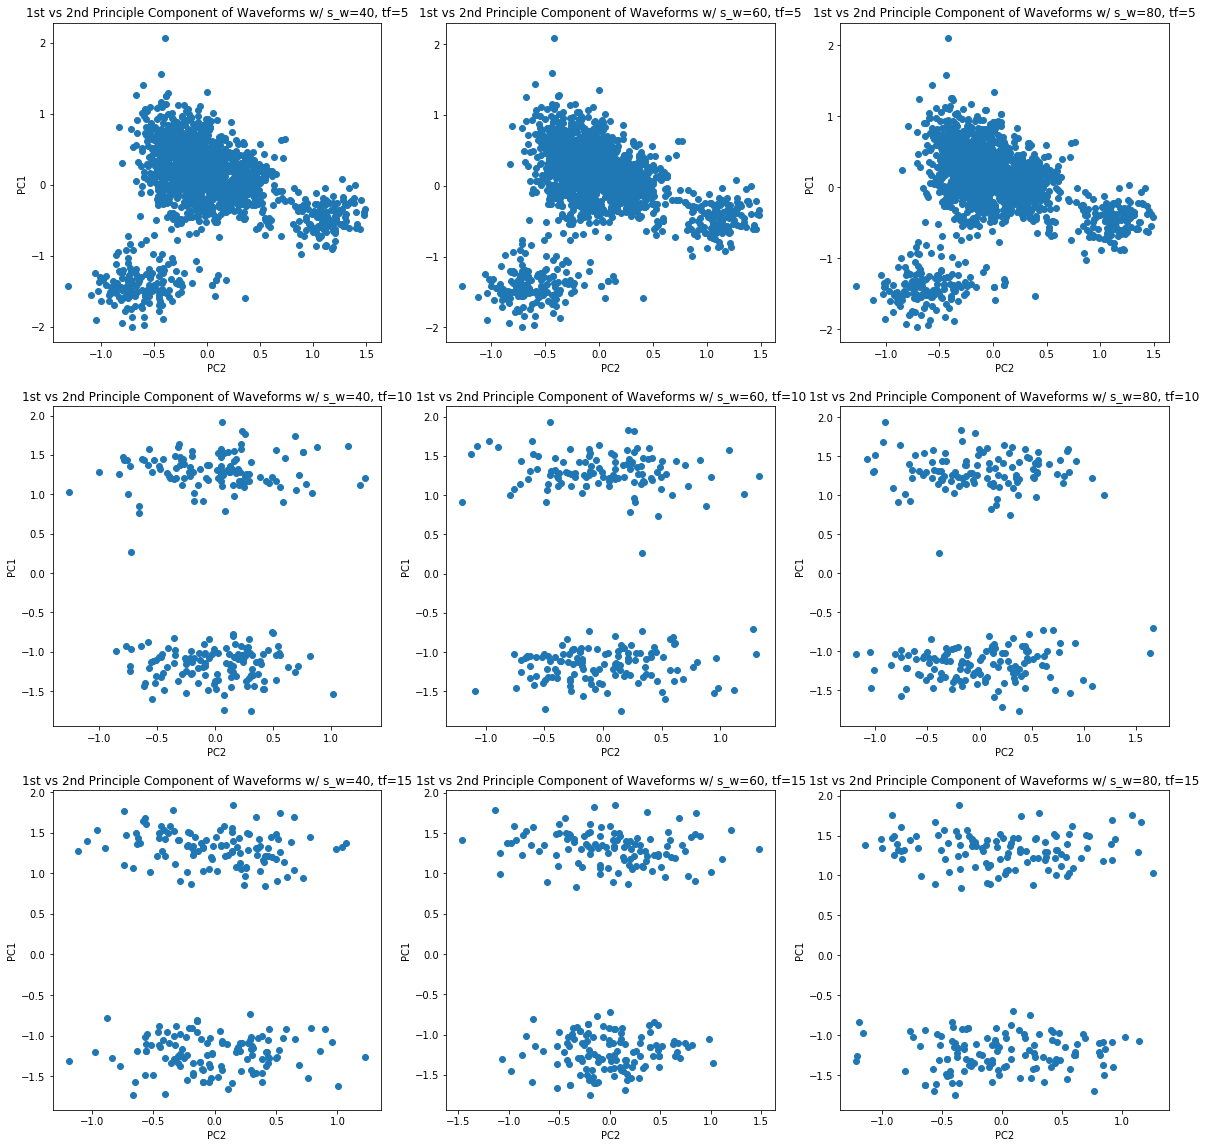

In [6]:
plt.subplots(figsize=(20, 20))

waveform_scl = mmscaler.fit_transform(wave_form_40_5)
pca = PCA(n_components = 2)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(331)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=40, tf=5')
plt.xlabel('PC2')
plt.ylabel('PC1')



waveform_scl = mmscaler.fit_transform(wave_form_60_5)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(332)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=60, tf=5')
plt.xlabel('PC2')


waveform_scl = mmscaler.fit_transform(wave_form_80_5)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(333)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=80, tf=5')
plt.xlabel('PC2')
plt.ylabel('PC1')


waveform_scl = mmscaler.fit_transform(wave_form_40_10)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(334)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=40, tf=10')
plt.xlabel('PC2')
plt.ylabel('PC1')


waveform_scl = mmscaler.fit_transform(wave_form_60_10)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(335)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=60, tf=10')
plt.xlabel('PC2')
plt.ylabel('PC1')

waveform_scl = mmscaler.fit_transform(wave_form_80_10)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(336)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=80, tf=10')
plt.xlabel('PC2')
plt.ylabel('PC1')

waveform_scl = mmscaler.fit_transform(wave_form_40_15)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(337)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=40, tf=15')
plt.xlabel('PC2')
plt.ylabel('PC1')


waveform_scl = mmscaler.fit_transform(wave_form_60_15)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(338)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=60, tf=15')
plt.xlabel('PC2')
plt.ylabel('PC1')

waveform_scl = mmscaler.fit_transform(wave_form_80_15)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(339)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=80, tf=15')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.show()

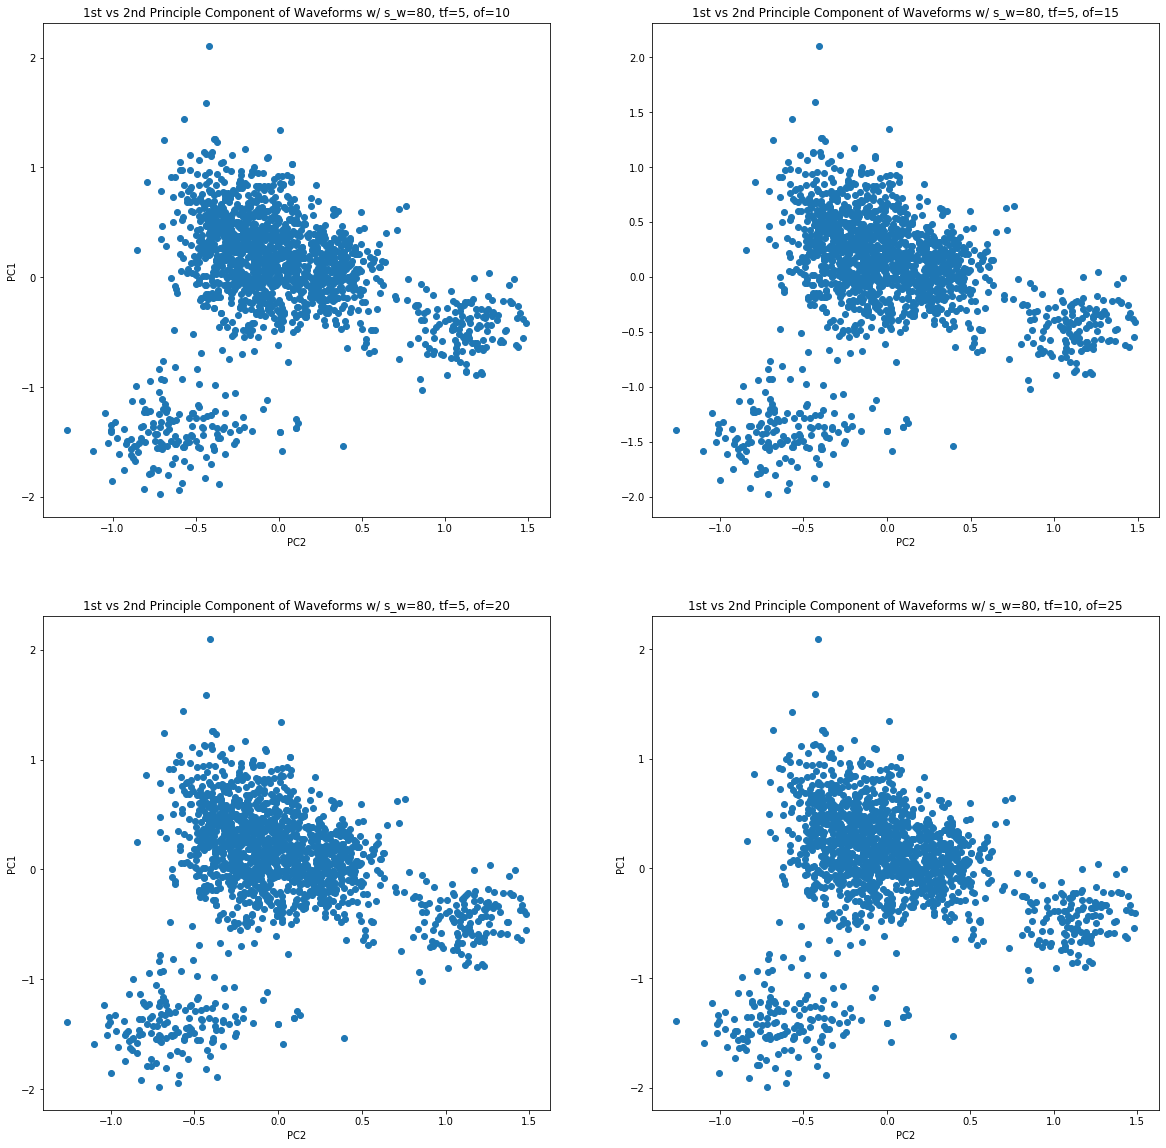

In [7]:
spike_samp, wave_form_80_5_10 = get_spikes(trace, spike_window=80, tf=5, offset=10)
spike_samp, wave_form_80_5_15 = get_spikes(trace, spike_window=80, tf=5, offset=15)
spike_samp, wave_form_80_5_20 = get_spikes(trace, spike_window=80, tf=5, offset=20)
spike_samp, wave_form_80_5_25 = get_spikes(trace, spike_window=80, tf=5, offset=25)

plt.subplots(figsize=(20, 20))

waveform_scl = mmscaler.fit_transform(wave_form_80_5_10)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(221)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=80, tf=5, of=10')
plt.xlabel('PC2')
plt.ylabel('PC1')



waveform_scl = mmscaler.fit_transform(wave_form_80_5_15)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(222)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=80, tf=5, of=15')
plt.xlabel('PC2')


waveform_scl = mmscaler.fit_transform(wave_form_80_5_20)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(223)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=80, tf=5, of=20')
plt.xlabel('PC2')
plt.ylabel('PC1')


waveform_scl = mmscaler.fit_transform(wave_form_80_5_25)
X2D_mm = pca.fit_transform(waveform_scl)
plt.subplot(224)
plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0])
plt.title('1st vs 2nd Principle Component of Waveforms w/ s_w=80, tf=10, of=25')
plt.xlabel('PC2')
plt.ylabel('PC1')

plt.show()

Changing offset has no significant difference, so stick with default.

# Perform k-means clustering

<function matplotlib.pyplot.show(*args, **kw)>

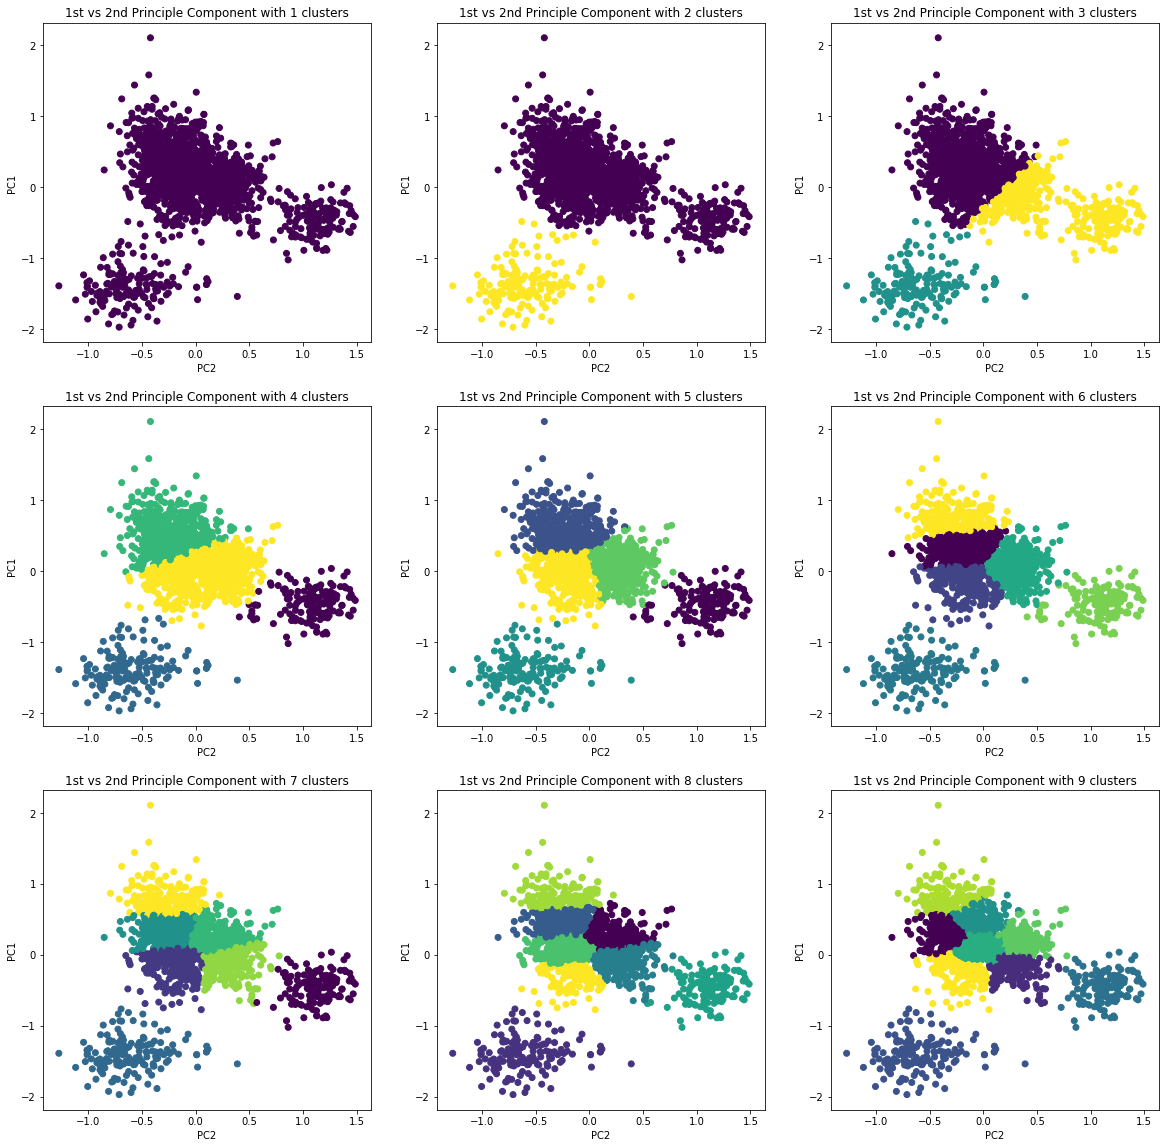

In [8]:
from sklearn.cluster import KMeans
spike_samp, wave_form = get_spikes(trace, spike_window=80, tf=5, offset=10)
waveform_scl = mmscaler.fit_transform(wave_form)
X2D_mm = pca.fit_transform(waveform_scl)

# Check for up to 9 clusters
maxclusnum=9
plt.subplots(figsize=(20, 20))
for i in range(maxclusnum):
    kmeans = KMeans(n_clusters=i+1, random_state=42)
    y_pred  = kmeans.fit_predict(X2D_mm)
    plt.subplot(3,3,i+1)
    plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0],c=y_pred)
    plt.title('1st vs 2nd Principle Component with ' + str(i+1) +' clusters')
    plt.xlabel('PC2')
    plt.ylabel('PC1')
plt.show    

It looks like 3-5 distinct clusters exist, corresponding 3-5 neurons. May need to look at other unsupervised learning techniques to confirm.

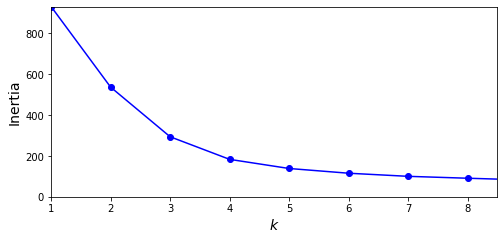

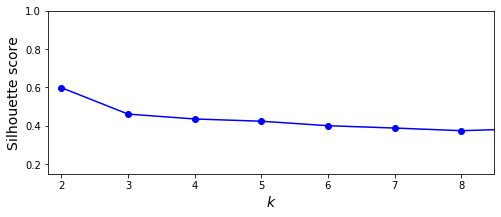

In [9]:
# Visualize Inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2D_mm)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, np.amax(inertias) ])
plt.show()

from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X2D_mm, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.15, 1])
plt.show()

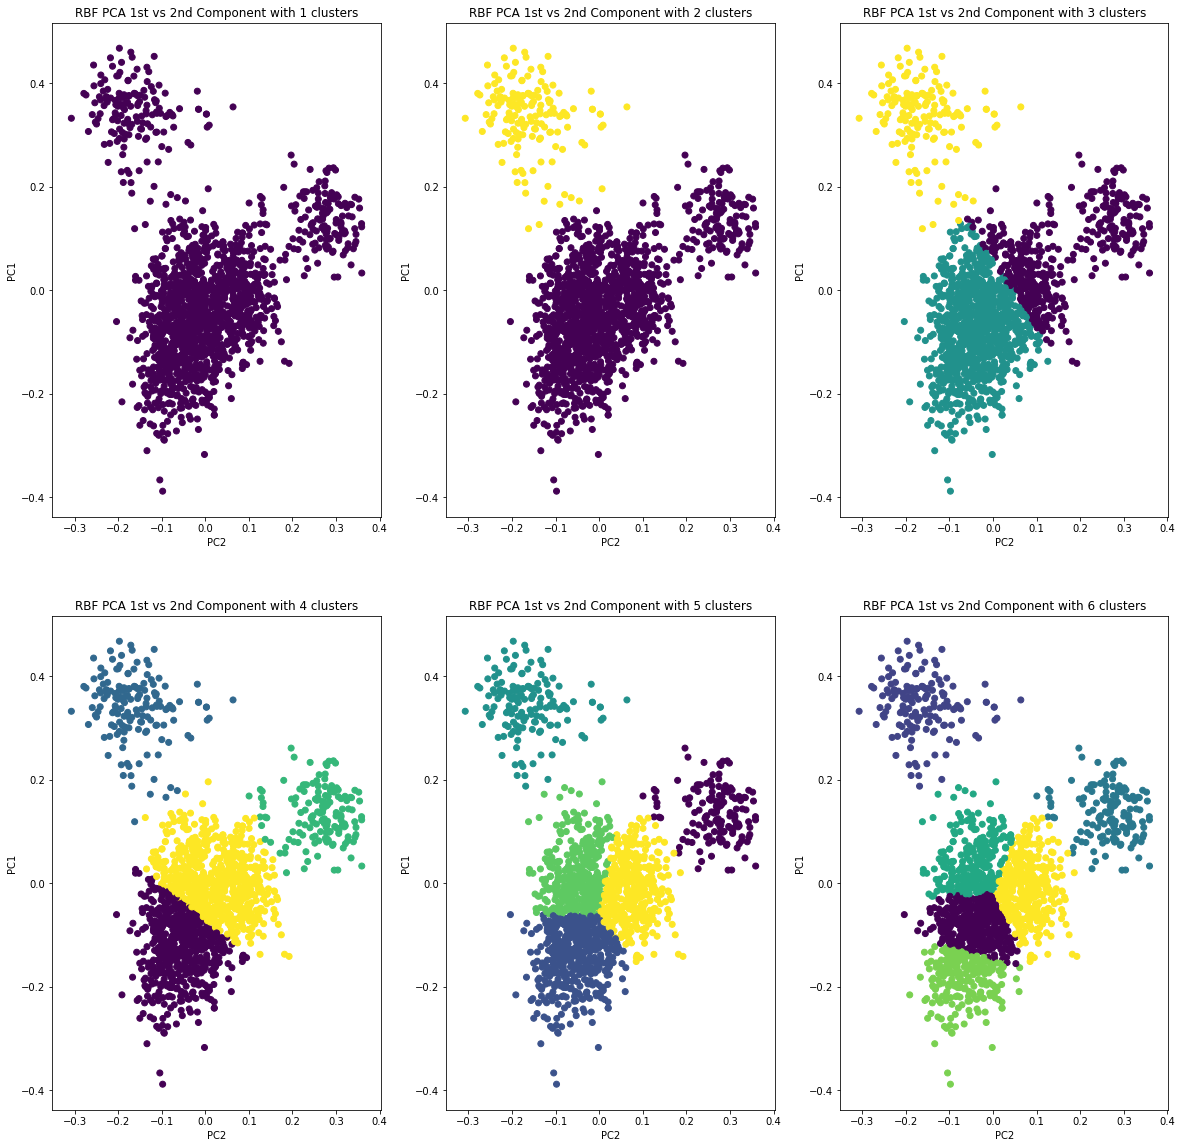

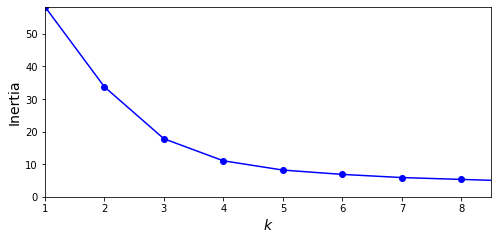

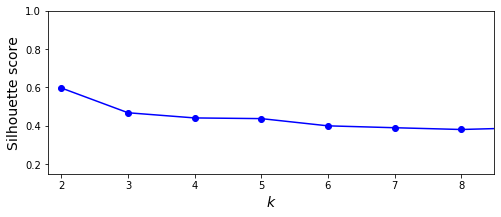

In [10]:
# Try other PCA
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

#Try other Manifolds
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
mds = MDS(n_components=2, random_state=42)
isomap = Isomap(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

spike_samp, wave_form = get_spikes(trace, spike_window=80, tf=5, offset=10)
waveform_scl = mmscaler.fit_transform(wave_form)

#Change algorithm ex pca.fit...lle.fit...
X2D_mm = rbf_pca.fit_transform(waveform_scl)

# Check for up to 6 clusters
maxclusnum=6
plt.subplots(figsize=(20, 20))
for i in range(maxclusnum):
    kmeans = KMeans(n_clusters=i+1, random_state=42)
    y_pred  = kmeans.fit_predict(X2D_mm)
    plt.subplot(2,3,i+1)
    plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0],c=y_pred)
    plt.title('RBF PCA 1st vs 2nd Component with ' + str(i+1) +' clusters')
    plt.xlabel('PC2')
    plt.ylabel('PC1')
plt.show    

# Visualize Inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2D_mm)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, np.amax(inertias) ])
plt.show()

from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X2D_mm, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.15, 1])
plt.show()

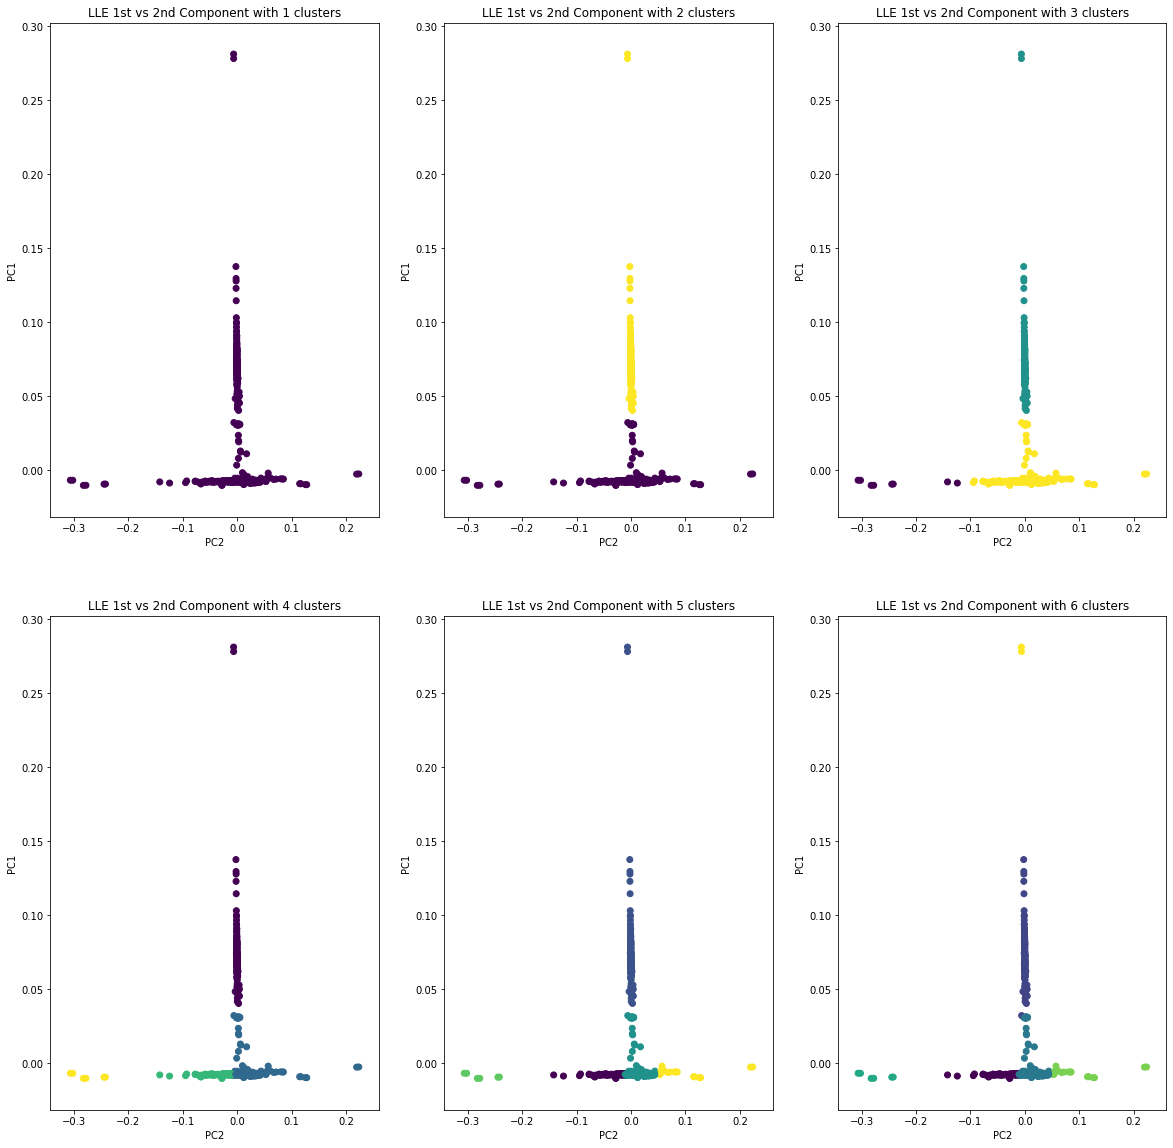

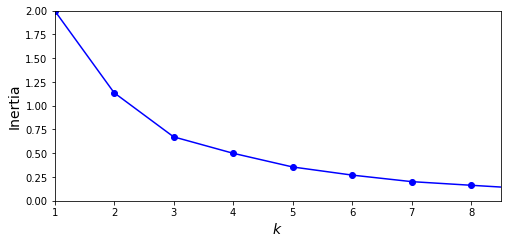

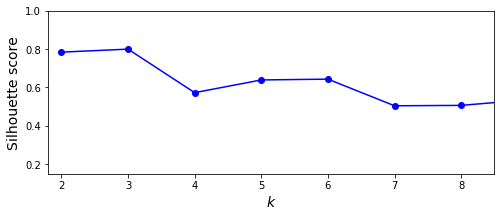

In [11]:
# Try LLE
X2D_mm = lle.fit_transform(waveform_scl)

# Check for up to 6 clusters
maxclusnum=6
plt.subplots(figsize=(20, 20))
for i in range(maxclusnum):
    kmeans = KMeans(n_clusters=i+1, random_state=42)
    y_pred  = kmeans.fit_predict(X2D_mm)
    plt.subplot(2,3,i+1)
    plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0],c=y_pred)
    plt.title('LLE 1st vs 2nd Component with ' + str(i+1) +' clusters')
    plt.xlabel('PC2')
    plt.ylabel('PC1')
plt.show   

# Visualize Inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2D_mm)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, np.amax(inertias) ])
plt.show()

from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X2D_mm, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.15, 1])
plt.show()

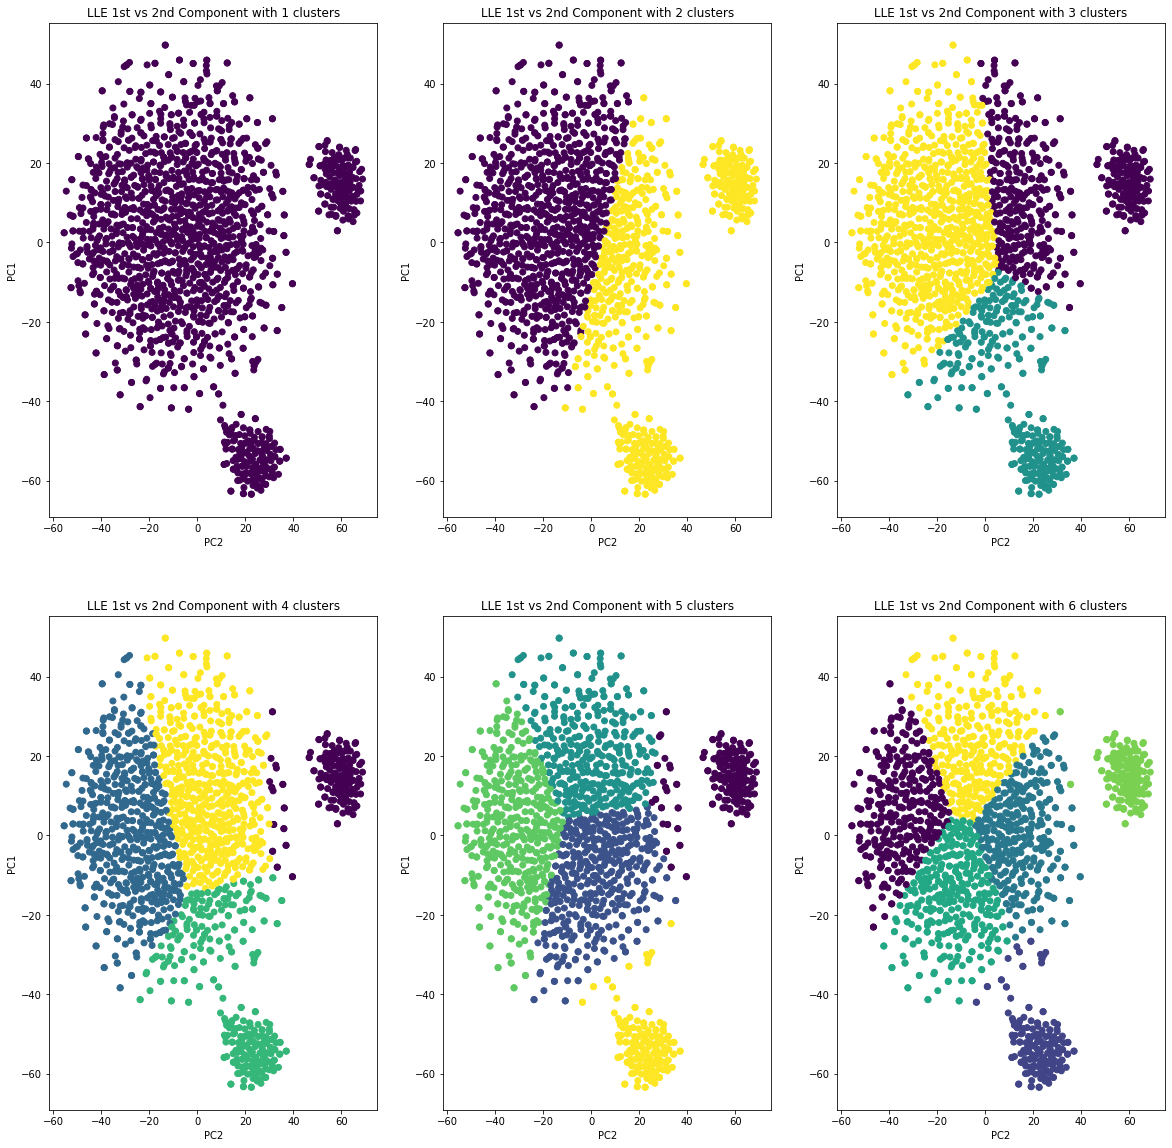

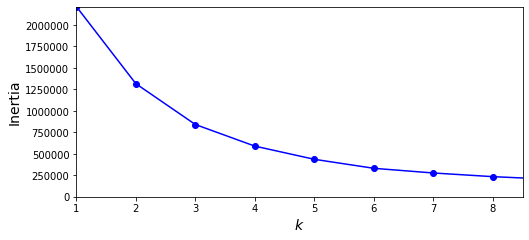

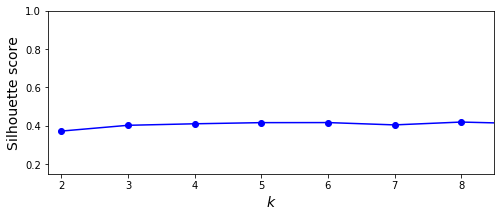

In [12]:
# Try t-SNE
X2D_mm = tsne.fit_transform(waveform_scl)

# Check for up to 6 clusters
maxclusnum=6
plt.subplots(figsize=(20, 20))
for i in range(maxclusnum):
    kmeans = KMeans(n_clusters=i+1, random_state=42)
    y_pred  = kmeans.fit_predict(X2D_mm)
    plt.subplot(2,3,i+1)
    plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0],c=y_pred)
    plt.title('LLE 1st vs 2nd Component with ' + str(i+1) +' clusters')
    plt.xlabel('PC2')
    plt.ylabel('PC1')
plt.show   

# Visualize Inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2D_mm)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, np.amax(inertias) ])
plt.show()

from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X2D_mm, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.15, 1])
plt.show()

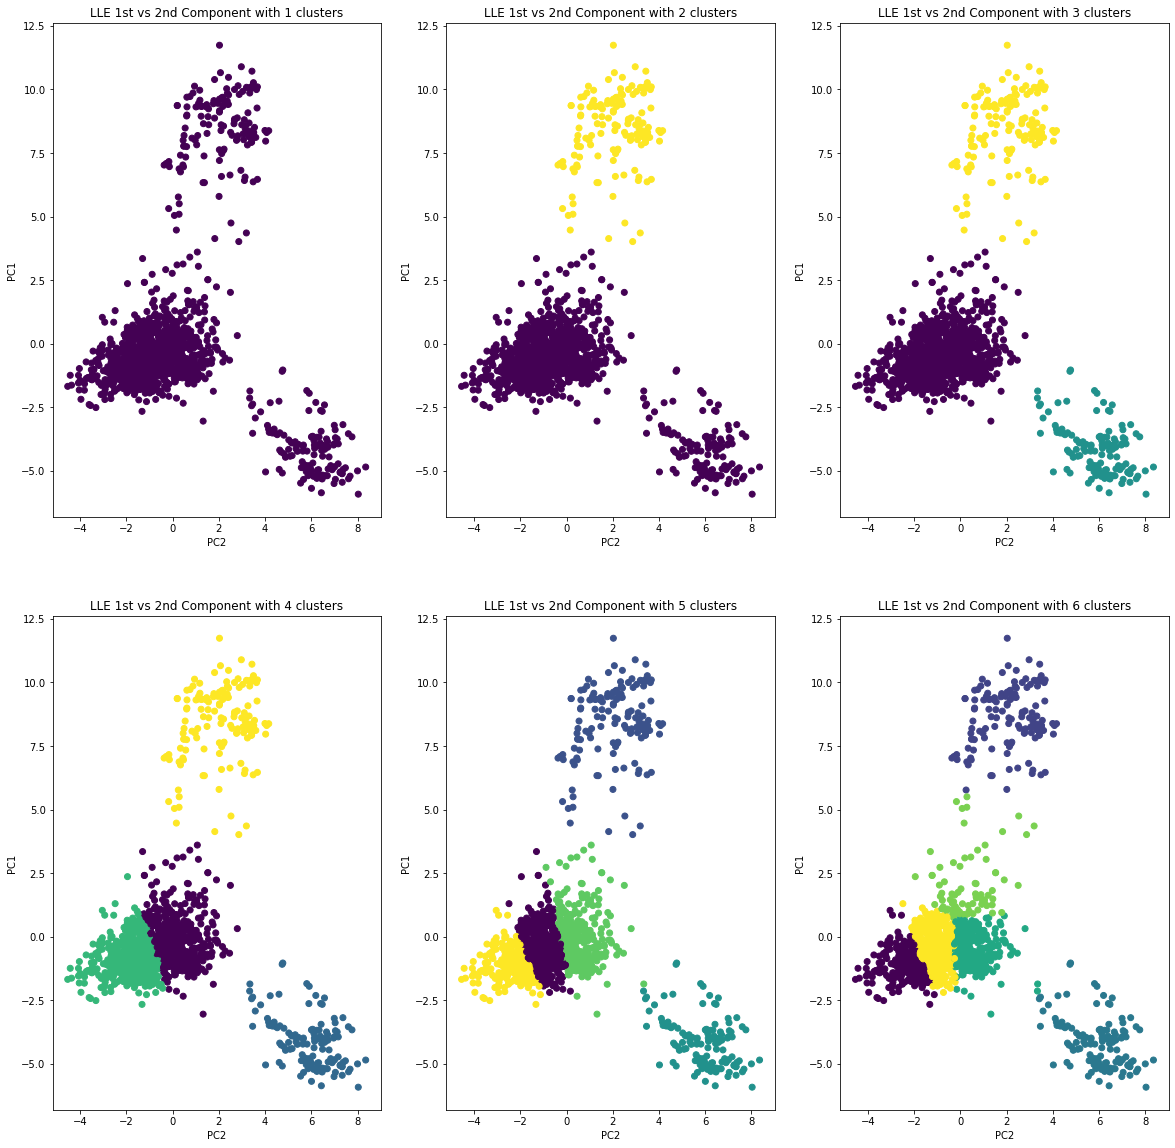

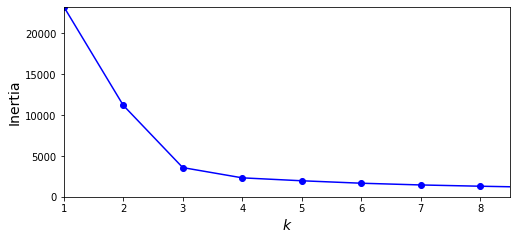

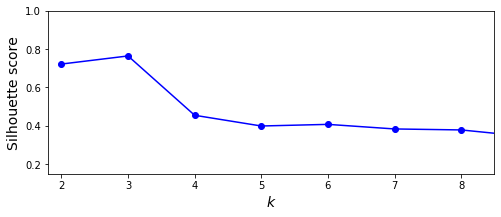

In [13]:
# Try IsoMap
X2D_mm = isomap.fit_transform(waveform_scl)

# Check for up to 6 clusters
maxclusnum=6
plt.subplots(figsize=(20, 20))
for i in range(maxclusnum):
    kmeans = KMeans(n_clusters=i+1, random_state=42)
    y_pred  = kmeans.fit_predict(X2D_mm)
    plt.subplot(2,3,i+1)
    plt.scatter(X2D_mm[:, 1], X2D_mm[:, 0],c=y_pred)
    plt.title('LLE 1st vs 2nd Component with ' + str(i+1) +' clusters')
    plt.xlabel('PC2')
    plt.ylabel('PC1')
plt.show   

# Visualize Inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2D_mm)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, np.amax(inertias) ])
plt.show()

from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X2D_mm, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.15, 1])
plt.show()

Looks like there's an elbow at 3 means for most methods and highest silhouette score there too. Choose 3 distinct clusterns are optimal.

# Plot Average Waveform

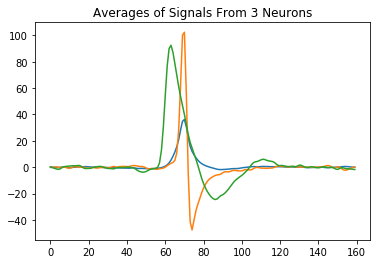

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred  = kmeans.fit_predict(X2D_mm)
plt.plot(np.mean(wave_form[y_pred==0], axis=0))
plt.plot(np.mean(wave_form[y_pred==1], axis=0))
plt.plot(np.mean(wave_form[y_pred==2], axis=0))
#plt.plot(np.mean(wave_form[y_pred==3], axis=0))
#plt.plot(np.mean(wave_form[y_pred==4], axis=0))
plt.title('Averages of Signals From 3 Neurons')
plt.show()